# Assignment # 1 :
## Part 1 : PCA
### Hassan Ashiq BESE 23 C

In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import eig

#### Stored Iris Data in 'file'

In [155]:
file=pd.read_csv('iris_data.csv', index_col=4)

In [156]:
file

,sepal_length,sepal_width,petal_length,petal_width
plant_class,,,,
Iris-setosa,5.1,3.5,1.4,0.2
Iris-setosa,4.9,3.0,1.4,0.2
Iris-setosa,4.7,3.2,1.3,0.2
Iris-setosa,4.6,3.1,1.5,0.2
Iris-setosa,5.0,3.6,1.4,0.2
...,...,...,...,...
Iris-virginica,6.7,3.0,5.2,2.3
Iris-virginica,6.3,2.5,5.0,1.9
Iris-virginica,6.5,3.0,5.2,2.0


#### Finding mean value of each column

In [157]:
mean_values=file.mean()
mean_values



sepal_length    5.843333
sepal_width     3.054000
petal_length    3.758667
petal_width     1.198667
dtype: float64

#### Next, we need to center the values in each column by subtracting the mean column value.

In [158]:
centered_file=file.subtract(mean_values, axis=1)
centered_file

,sepal_length,sepal_width,petal_length,petal_width
plant_class,,,,
Iris-setosa,-0.743333,0.446,-2.358667,-0.998667
Iris-setosa,-0.943333,-0.054,-2.358667,-0.998667
Iris-setosa,-1.143333,0.146,-2.458667,-0.998667
Iris-setosa,-1.243333,0.046,-2.258667,-0.998667
Iris-setosa,-0.843333,0.546,-2.358667,-0.998667
...,...,...,...,...
Iris-virginica,0.856667,-0.054,1.441333,1.101333
Iris-virginica,0.456667,-0.554,1.241333,0.701333
Iris-virginica,0.656667,-0.054,1.441333,0.801333


#### The next step is to calculate the covariance matrix of the centered matrix C.

In [159]:
variance=centered_file.cov()
variance

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,0.685694,-0.039268,1.273682,0.516904
sepal_width,-0.039268,0.188004,-0.321713,-0.117981
petal_length,1.273682,-0.321713,3.113179,1.296387
petal_width,0.516904,-0.117981,1.296387,0.582414


#### Finally, we calculate the eigendecomposition of the covariance matrix Variance. This results in a list of eigenvalues and a list of eigenvectors.

In [160]:
values,vectors=eig(variance)
print('Eigen Values are : ' ,values)
print('\nEigen Vectors are : \n',vectors)


Eigen Values are :  [4.22484077 0.24224357 0.07852391 0.02368303]

Eigen Vectors are : 
 [[ 0.36158968 -0.65653988 -0.58099728  0.31725455]
 [-0.08226889 -0.72971237  0.59641809 -0.32409435]
 [ 0.85657211  0.1757674   0.07252408 -0.47971899]
 [ 0.35884393  0.07470647  0.54906091  0.75112056]]


Text(0, 0.5, 'Value')

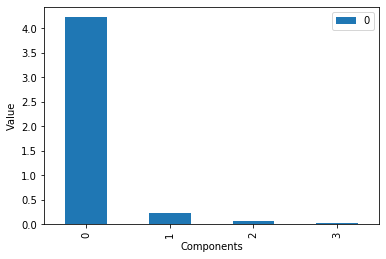

In [161]:
visualiz_values=pd.DataFrame(values).plot(kind='bar')
plt.xlabel('Components')
plt.ylabel('Value')

#### as the last two values near to zero so they represent components that can be disgarded


#### So, we will take the first two vectores

In [162]:
B=vectors[0:2]

### finally, projecting B on original matrix i.e  centered_file

In [186]:
reduced_matrix=pd.DataFrame(centered_file.dot(B.T))

In [189]:
reduced_matrix.columns=['']*len(reduced_matrix.columns)

In [190]:
reduced_matrix.columns=['PCA_1','PCA_2']

In [214]:
reduced_matrix

,PCA_1,PCA_2
plant_class,,
Iris-setosa,0.491949,-1.347388
Iris-setosa,0.747901,-0.966078
Iris-setosa,0.602375,-1.155208
Iris-setosa,0.515670,-0.954727
Iris-setosa,0.390136,-1.412132
...,...,...
Iris-virginica,-0.142793,0.471629
Iris-virginica,0.030139,0.879747
Iris-virginica,-0.310287,0.585311


### Visualizating Data after PCA Analysis

Text(0, 0.5, 'Principal Component 2')

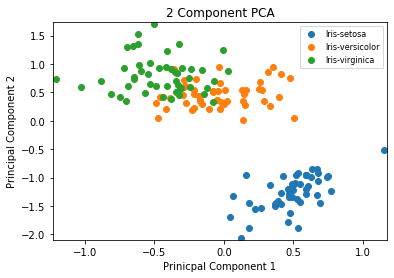

In [213]:
for key, group in reduced_matrix.groupby(['plant_class']):
    plt.plot(group['PCA_1'], group['PCA_2'],
                label=key, marker='o',linestyle='none')
    
plt.legend(loc='upper right', fontsize=8)
plt.margins(0.01)
plt.title('2 Component PCA')
plt.xlabel('Prinicpal Component 1')
plt.ylabel('Principal Component 2')

# Part 1 of Assignment 1
## Information Retrieval 
### Submitted to Ma'am Naima
#### Submitted by : Hassan Ashiq BESE 23 C